# 0. **Module**

In [2]:
from tqdm import notebook
import controller as ct
import matplotlib.pyplot as plt
import Envir_setting as env
import pickle
import numpy as np
import networkx as nx

# 1-1. **Set the variables**

- **Graph configuration** 
    * Randomly generated network with #nodes = 50, #edges = 200
    * Total time = frame_size(500) * frame_rep(20) = $10^4$ time slots
    
    
- **Arrival rates and transmission rates setting**
    * Arrival rate of each link is determined in $[0.4, 0.7]$ at random
    * Transmission rate of each link is determined in $[0.25, 0.75]$ at random
    
    
- **Algorithm setting**
    * Implement $A^k$-UCB and $dA^k$-UCB with $k=3, 6, 9$
    * Compare the result of both algorithm with GMM which uses UCB as estimator


- **Result setting**
    * Results (section 3) are the expected results with 10 times repition

In [4]:
lower = 0.4
upper = 0.7
frame_size=500
div = 10
result_rep = 10

# 1-2. Generate arrival patterns and transmission rates

*Note:* If you want to get new arrival patterns and transmission rates, then run the below cell

In [8]:
env.generate_random_arrival_rates(200, lower, upper)
for i in range(1, div+1):
    env.generate_arrivals(200, lower, upper, i / div, frame_size, 20)
    
generate_transmissions(200,0.25,0.75)

# 1-3. Generate graph
- *Note:* 
    * If you want to generate new graph, run the first below cell
    * If you want to reuse the exising graph, run the second below cell

In [10]:
graph = ct.set_environment(50,200, lower , upper , 0.25, 0.75, frame_size, 20)
with open('graph_info.txt', 'wb') as f:
    pickle.dump(graph,f)

In [5]:
with open('graph_info.txt', 'rb') as f:
    graph = pickle.load(f)

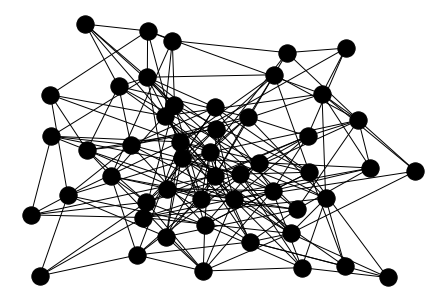

In [121]:
# with open('graph_info.txt', 'rb') as f:
#     graph = pickle.load(f)
fig = plt.figure()
pos = nx.spring_layout(graph.graph)
nx.draw(graph.graph,pos=pos,node_color='k')
fig.savefig('Network topology ',bbox_inches = "tight")   


# 2-1. Implement $A^k$-UCB algorithm

In [ ]:
for rep in notebook.tqdm(range(1,result_rep+1)):
    queue_trace_A_3 = []
    queue_trace_A_6 = []
    queue_trace_A_9 = []
    queue_trace_GMM = []
    
    for i in notebook.tqdm(range(1, div + 1)):
        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_A_3.append(ct.A_k_algorithm(0.3, 3, graph, 'UCB', frame_size, 20))

        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_A_6.append(ct.A_k_algorithm(0.3, 6, graph, 'UCB', frame_size, 20))

        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_A_9.append(ct.A_k_algorithm(0.3, 9, graph, 'UCB', frame_size, 20)) 

        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_GMM.append(ct.GMM_algorithm(graph, 'UCB', frame_size,20))
        
        
    plt.plot(queue_trace_A_3, 'r--', label='A^3-UCB')
    plt.plot(queue_trace_A_6, 'b--', label='A^6-UCB')
    plt.plot(queue_trace_A_9, 'g--', label='A^9-UCB')

    plt.plot(queue_trace_GMM, 'k--', label='GMM')
    plt.xlabel('lambda', fontsize=15)
    plt.ylabel('Queue', fontsize=15)
    plt.ylim(0,5000)
    plt.legend()
    plt.show()

    result1 = ' '.join(map(str,queue_trace_A_3))
    result2 = ' '.join(map(str,queue_trace_A_6))
    result3 = ' '.join(map(str,queue_trace_A_9))

    with open('./results/' + f'A^k-UCB{rep}(nodes {50}, edges {200},k {3}, p_seed {0.3}.txt','w') as f:
            f.write(result1)    
    with open('./results/' + f'A^k-UCB{rep}(nodes {50}, edges {200},k {6}, p_seed {0.3}.txt','w') as f:
            f.write(result2)
    with open('./results/' + f'A^k-UCB{rep}(nodes {50}, edges {200},k {9}, p_seed {0.3}.txt','w') as f:
            f.write(result3)

    result4 = ' '.join(map(str,queue_trace_GMM))
    with open('./results/' + f'GMM-UCB{rep}(nodes {50}, edges {200}.txt','w') as f:
            f.write(result4)   

# 2-2. Implement $dA^k$-UCB algorithm

In [ ]:
for rep in notebook.tqdm(range(1,result_rep+1)):
    queue_trace_A_3 = []
    queue_trace_A_6 = []
    queue_trace_A_9 = []
    queue_trace_GMM = []
    
    for i in notebook.tqdm(range(1, div + 1)):
        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_A_3.append(ct.dA_k_algorithm(0.3, 3, graph, 'UCB', frame_size, 20))

        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_A_6.append(ct.dA_k_algorithm(0.3, 6, graph, 'UCB', frame_size, 20))

        graph.reset_environment(200, lower * i / div, upper * i / div, 0.25, 0.75, frame_size, 20)
        queue_trace_A_9.append(ct.dA_k_algorithm(0.3, 9, graph, 'UCB', frame_size, 20)) 

        with open('./results/' + f'GMM-UCB{i}(nodes {50}, edges {200}.txt','r') as f:
            queue_trace_GMM = f.read().split()
            queue_trace_GMM = list(map(int, queue_trace_GMM))
        
        
    plt.plot(queue_trace_A_3, 'r--', label='A^3-UCB')
    plt.plot(queue_trace_A_6, 'b--', label='A^6-UCB')
    plt.plot(queue_trace_A_9, 'g--', label='A^9-UCB')

    plt.plot(queue_trace_GMM, 'k--', label='GMM')
    plt.xlabel('lambda', fontsize=15)
    plt.ylabel('Queue', fontsize=15)
    plt.ylim(0,5000)
    plt.legend()
    plt.show()

    result1 = ' '.join(map(str,queue_trace_A_3))
    result2 = ' '.join(map(str,queue_trace_A_6))
    result3 = ' '.join(map(str,queue_trace_A_9))

    with open('./results/' + f'dA^k-UCB{rep}(nodes {50}, edges {200},k {3}, p_seed {0.3}.txt','w') as f:
            f.write(result1)    
    with open('./results/' + f'dA^k-UCB{rep}(nodes {50}, edges {200},k {6}, p_seed {0.3}.txt','w') as f:
            f.write(result2)
    with open('./results/' + f'dA^k-UCB{rep}(nodes {50}, edges {200},k {9}, p_seed {0.3}.txt','w') as f:
            f.write(result3)

# 3-1. Draw the expected result of $A^k$-UCB 

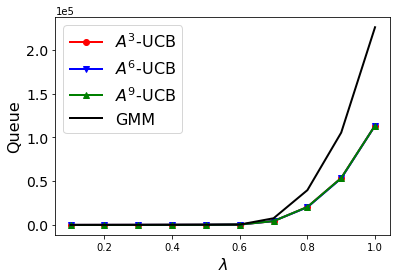

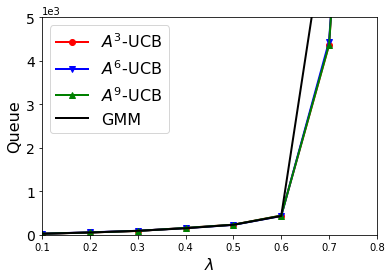

In [11]:
mean_queue_trace_A_3=np.zeros(div)
mean_queue_trace_A_6=np.zeros(div)
mean_queue_trace_A_9=np.zeros(div)
mean_queue_trace_GMM=np.zeros(div)

for i in range(1,div+1):
    with open('./results/' + f'A^k-UCB{i}(nodes {50}, edges {200},k {3}, p_seed {0.3}.txt','r') as f:
            queue_trace_A_3=f.read().split()
            mean_queue_trace_A_3 += np.array(list(map(int,queue_trace_A_3)))
    with open('./results/' + f'A^k-UCB{i}(nodes {50}, edges {200},k {6}, p_seed {0.3}.txt','r') as f:
            queue_trace_A_6=f.read().split()
            mean_queue_trace_A_6 += np.array(list(map(int,queue_trace_A_6)))
    with open('./results/' + f'A^k-UCB{i}(nodes {50}, edges {200},k {3}, p_seed {0.3}.txt','r') as f:
            queue_trace_A_9=f.read().split()
            mean_queue_trace_A_9 += np.array(list(map(int,queue_trace_A_9)))
    with open('./results/' + f'GMM-UCB{i}(nodes {50}, edges {200}.txt','r') as f:
            queue_trace_GMM = f.read().split()
            mean_queue_trace_GMM += np.array(list(map(int,queue_trace_GMM)))
            
fig1=plt.figure()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 5)); plt.yticks(fontsize=14)

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_A_3/div, 'or-', linewidth=2, label=r'$A^3$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_A_6/div, 'vb-', linewidth=2, label=r'$A^6$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_A_9/div, '^g-', linewidth=2, label=r'$A^9$-UCB')

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_GMM/div, 'k-', linewidth=2, label='GMM')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('Queue', fontsize=16)
plt.legend(fontsize=16)
fig1.savefig('Original Stability for $A^k-UCB$',bbox_inches = "tight")


fig2=plt.figure()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 3)); plt.yticks(fontsize=14)

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_A_3/div, 'or-', linewidth=2, label=r'$A^3$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_A_6/div, 'vb-', linewidth=2, label=r'$A^6$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_A_9/div, '^g-', linewidth=2, label=r'$A^9$-UCB')

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_GMM/div, 'k-', linewidth=2, label='GMM')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('Queue', fontsize=16)
plt.ylim(0,5000)
plt.xlim(0.1,0.8)
plt.legend(fontsize=16)
fig2.savefig('Edited Stability for $A^k-UCB$',bbox_inches = "tight")

plt.show()

   

# 3-2. Draw the expected result of $dA^k$-UCB 

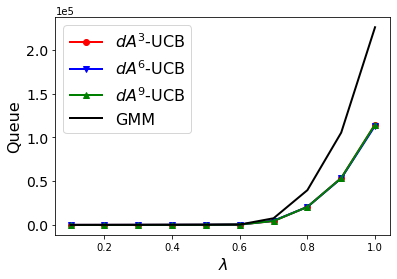

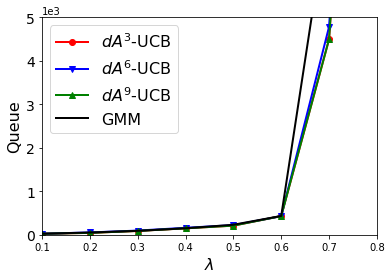

In [15]:
mean_queue_trace_dA_3=np.zeros(div)
mean_queue_trace_dA_6=np.zeros(div)
mean_queue_trace_dA_9=np.zeros(div)
mean_queue_trace_GMM=np.zeros(div)

for i in range(1,div+1):
    with open('./results/' + f'dA^k-UCB{i}(nodes {50}, edges {200},k {3}, p_seed {0.3}.txt','r') as f:
            queue_trace_dA_3=f.read().split()
            mean_queue_trace_dA_3 += np.array(list(map(int,queue_trace_A_3)))
    with open('./results/' + f'dA^k-UCB{i}(nodes {50}, edges {200},k {6}, p_seed {0.3}.txt','r') as f:
            queue_trace_dA_6=f.read().split()
            mean_queue_trace_dA_6 += np.array(list(map(int,queue_trace_A_6)))
    with open('./results/' + f'dA^k-UCB{i}(nodes {50}, edges {200},k {3}, p_seed {0.3}.txt','r') as f:
            queue_trace_dA_9=f.read().split()
            mean_queue_trace_dA_9 += np.array(list(map(int,queue_trace_A_9)))
    with open('./results/' + f'GMM-UCB{i}(nodes {50}, edges {200}.txt','r') as f:
            queue_trace_GMM = f.read().split()
            mean_queue_trace_GMM += np.array(list(map(int,queue_trace_GMM)))
            
fig1=plt.figure()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 5)); plt.yticks(fontsize=14)

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_dA_3/div, 'or-', linewidth=2, label=r'$dA^3$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_dA_6/div, 'vb-', linewidth=2, label=r'$dA^6$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_dA_9/div, '^g-', linewidth=2, label=r'$dA^9$-UCB')

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_GMM/div, 'k-', linewidth=2, label='GMM')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('Queue', fontsize=16)
plt.legend(fontsize=16)
fig1.savefig('Original Stability for $dA^k-UCB$',bbox_inches = "tight")
   
fig2=plt.figure()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 3)); plt.yticks(fontsize=14)

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_dA_3/div, 'or-', linewidth=2, label=r'$dA^3$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_dA_6/div, 'vb-', linewidth=2, label=r'$dA^6$-UCB')
plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_dA_9/div, '^g-', linewidth=2, label=r'$dA^9$-UCB')

plt.plot([i/div for i in range(1,div+1)],mean_queue_trace_GMM/div, 'k-', linewidth=2, label='GMM')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('Queue', fontsize=16)
plt.ylim(0,5000)
plt.xlim(0.1,0.8)
plt.legend(fontsize=16)
fig2.savefig('Edited Stability for $dA^k-UCB$',bbox_inches = "tight")    
             
plt.show()
    